<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Format" data-toc-modified-id="Format-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#Phylogenetic-signal" data-toc-modified-id="Phylogenetic-signal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Phylogenetic signal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#combined-plot" data-toc-modified-id="combined-plot-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>combined plot</a></span><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-6.0.1.1"><span class="toc-item-num">6.0.1.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li></ul></li><li><span><a href="#lipaMoran" data-toc-modified-id="lipaMoran-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>lipaMoran</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#iTOL" data-toc-modified-id="iTOL-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>iTOL</a></span><ul class="toc-item"><li><span><a href="#Number-of-OTUs-per-species" data-toc-modified-id="Number-of-OTUs-per-species-6.1.2.1"><span class="toc-item-num">6.1.2.1&nbsp;&nbsp;</span>Number of OTUs per species</a></span></li><li><span><a href="#heatmap" data-toc-modified-id="heatmap-6.1.2.2"><span class="toc-item-num">6.1.2.2&nbsp;&nbsp;</span>heatmap</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Estimate phylogenetic signal of ASVs

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig/'

# microbiome
## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD_rare250.RDS'

# host tree
host_tree_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_200429_16S-arch.nwk'

# misc params
threads = 8
my_seed = 8394

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

library(ape)
library(phyloseq)
library(phylosignal)

library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
df.dims()
set.seed(my_seed)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig/ 


# Load

In [4]:
# phyloseq obj.
physeq = readRDS(physeq_arch_IndD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1345 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1345 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1345 tips and 1342 internal nodes ]

In [5]:
# otu table
otu = physeq %>%
    phyloseq2df(otu_table) %>%
    as.data.frame
rownames(otu) = otu$OTU
otu$OTU = NULL

otu = otu %>% t %>% as.data.frame
otu

,6932d1bb056925b4bb8d4dd67a43c2ea,21751bfde2294a2dae4b25267b4ca645,5b59efa31f5f61fd67d891d0dcbdb847,d28557e3e13edcf0663750434405e367,be924719a6db01e2bdadf0853ca2b773,ce17b53d2541af4276cf5bd95e890366,61b842f1f453e9b7692b3260b1a66727,1b2efe04500379a5cb29c8c03338fc0f,46b11ee352fdaf12f097e72692de43d7,59466531fc959e7dd8386046e140e3cc,⋯,0bb1248eb978fd441a262847bfbd3551,b171d5cdecd235e7199d44ce8991794d,36fd5c55ad082f4d05194157da9d13da,4d8638444a9f4c677186bdca6d98faf7,2b66fb1465cd517c045246dcfb65cf22,6493fe11652884576b29d0e88d5a04f8,d7dd0bdd8184f8cb7189e1e09afa97d0,cae139881fad12a7824f229a3f6eaf54,9449f372c36cd2d8994d79b091425d42,467eeae6997d3667b5d07a76bc1bcdfd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0.0,0,0,0
F35_Red_Deer,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,3.6,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
X67_European_Roe,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
## filtering by prevalence
prev = apply(otu, 2, function(x) sum(x > 1))
otu = otu[,prev > 2]
otu

,6e9321684640a05dd16b7bc01b98c14a,0c59c44aeb355d3aa4dfa33ac4e77cde,7950a70a07006f7c7b0c6f02c46a93af,f3255c4c00f1f3b2659676adcfaa5e77,62906208121e40677fa119639a2ec0c9,48280e07b5f483101251b58c65114b86,92b3456d187efa8a6c7faf06479ffe22,861c85239d21bf467158a1a867489ebf,374124b31bc99545aa5f2388a3d7bd2b,8607365e502280f605239cd8ef7d8a4e,⋯,ffa3aadcd67c3d35238a0c1cd88bb9b6,720540adb17041d849a2ddd5ee263ab9,2de3f467031273dab285a370dc6fd85d,6c5b0990f1e56ac81d4f158ad3fe7ddf,f40a4552f05b5c3ca111c9886b7360a0,e50dfa4783c02bc4cbff9d9297e8d844,056a6332380b1f40d814d70adc074217,890c6bb9fc8dea9dc4b756a645f4f472,b171d5cdecd235e7199d44ce8991794d,36fd5c55ad082f4d05194157da9d13da
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
F35_Red_Deer,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
X67_European_Roe,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
cat('Total by ASV\n')
otu %>% colSums %>% summary

Total by ASV


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.40   16.70   34.80   74.21   74.50  688.00 

In [8]:
# metadata
metadata = physeq %>% 
    phyloseq2df(sample_data) %>%
    mutate(scientific_name = gsub(' ', '_', scientific_name))
metadata 

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd,Sample
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,F14_Common_Bream
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,1075.505,52.24132,27.18306,0.4858472,0.1686955,38.67117,21.30162,2066.942,1075.505,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,431,Steppenzebra,Quagga,Equus_quagga,NA,89252,Mammalia,Perissodactyla,Equidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X431_Quagga
X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X67_European_Roe


In [9]:
# host phylogeny
host_tree = read.tree(host_tree_SpecD_file)
host_tree


Phylogenetic tree with 110 tips and 109 internal nodes.

Tip labels:
	Leuciscus_cephalus, Rutilus_rutilus, Leuciscus_idus, Blicca_bjoerkna, Abramis_brama, Cyprinus_carpio, ...
Node labels:
	, @_20_@, @_17_@, @_14_@, @_9_@, @_15_@, ...

Rooted; includes branch lengths.

# Format

In [10]:
make_phylo4d = function(rep, otu, metadata, host_tree){
    # selecting samples
    m = metadata %>%
        group_by(scientific_name) %>%
        sample_n(1)
    otu = otu[m$SampleID,]
    rownames(otu) = m$scientific_name
    # checking overlap
    x = intersect(rownames(otu), host_tree$tip.label)
    y = union(rownames(otu), host_tree$tip.label)
    if(length(x) != length(y)){
        stop('Tree & OTU table labels do not fully match')
    }
    phylobase::phylo4d(host_tree, tip.data=otu)
}

In [11]:
# creating multiple phylo4d objects
n_reps = 100
host_tree_4d = 1:n_reps %>%
    lapply(make_phylo4d, otu=otu, metadata=metadata, host_tree=host_tree)
host_tree_4d %>% length

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



[1] 100

# Phylogenetic signal

In [38]:
# # phylosignal calculation
RhpcBLASctl::blas_set_num_threads(1)
registerDoParallel(threads)
physig_res = host_tree_4d %>%
    plyr::llply(phyloSignal, methods = 'Lambda', reps = 999, .parallel=TRUE)
physig_res %>% length

[1] 100

In [12]:
# saving output
outfile = file.path(work_dir, 'phylosignal_rare250.RDS')
outfile

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig//phylosignal_rare250.RDS"

In [39]:
# saving output
saveRDS(physig_res, outfile)
cat('File written:', outfile, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig//phylosignal_rare250.RDS 


In [14]:
# re-loading output
physig_res = readRDS(outfile)
physig_res %>% length

[1] 100

In [40]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/04_cophylo/02d_phylosignal_rare250.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



In [15]:
#' function for formatting the phylosignal results
format_physig_res = function(physig_res){
    tmp1 = physig_res$stat 
    tmp1$OTU = rownames(tmp1)

    tmp2 = physig_res$pvalue
    tmp3 = apply(tmp2, 2, function(x) p.adjust(x, method='BH')) %>% as.data.frame
    tmp2$OTU = rownames(tmp2)
    tmp3$OTU = rownames(tmp2)

    tmp1 = tmp1 %>%
        gather(method, coef, -OTU)
    tmp2 = tmp2 %>%
        gather(method, pvalue, -OTU)
             
    physig_res_j = tmp1 %>%
        inner_join(tmp2, c('OTU', 'method')) %>%
        mutate(pvalue = pvalue %>% as.Num,
               qvalue = p.adjust(pvalue, method='BH')) 
             
    return(physig_res_j)
}

In [16]:
# merging results
physig_res_j = physig_res %>%
    lapply(format_physig_res) %>%
    data.table::rbindlist(use.names=TRUE, idcol='perm_rep')
physig_res_j

perm_rep,OTU,method,coef,pvalue,qvalue
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,X6e9321684640a05dd16b7bc01b98c14a,Lambda,1.004485e+00,NA,NA
1,X0c59c44aeb355d3aa4dfa33ac4e77cde,Lambda,6.640786e-05,1,1
⋮,⋮,⋮,⋮,⋮,⋮
100,b171d5cdecd235e7199d44ce8991794d,Lambda,2.032770e-01,0.1003839,0.2849609
100,X36fd5c55ad082f4d05194157da9d13da,Lambda,6.640786e-05,1.0000000,1.0000000


In [17]:
# summary of p/q values
physig_res_j$pvalue %>% summary_x('pvalue')
physig_res_j$qvalue %>% summary_x('qvalue')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
pvalue,0.001,0.006724992,1,0.611931,1,1,1132,427.628,161.628


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
qvalue,0.003886364,0.02688016,1,0.6637212,1,1,1132,427.623,161.626


In [18]:
# summarizing
physig_res_j_s = physig_res_j %>%
    group_by(OTU, method) %>%
    summarize(coef = mean(coef),
              qvalue = (length(qvalue) - sum(qvalue < 0.05)) / length(qvalue),
              .groups='drop') %>%
    mutate(sig = qvalue < 0.05)

## number of signficant OTUs per method
physig_res_j_s %>%
    filter(sig == TRUE) %>%
    group_by(method) %>%
    summarize(n_sig = n(), .groups='drop')

method,n_sig
<chr>,<int>
Lambda,31


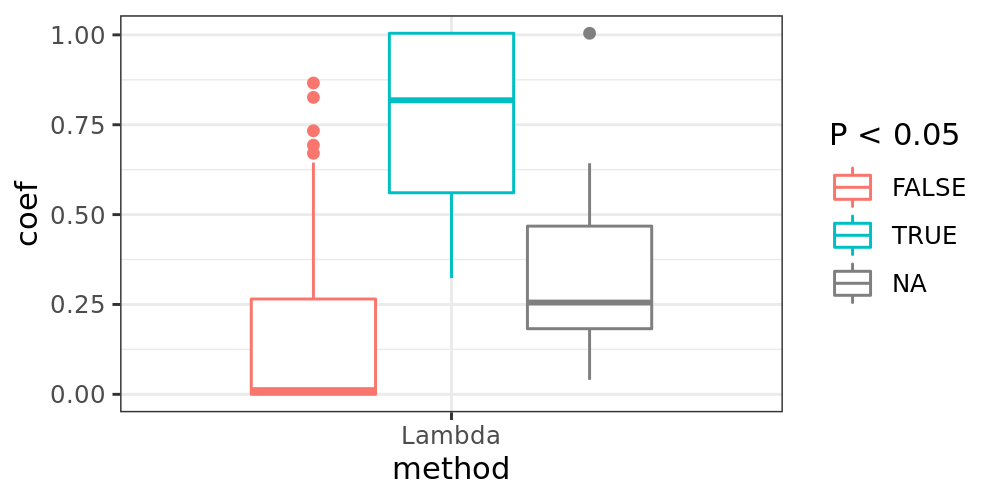

In [19]:
# plotting
p = physig_res_j_s %>%
    ggplot(aes(method, coef, color=sig)) +
    geom_boxplot() +
    scale_color_discrete('P < 0.05') +
    theme_bw() 

p.dims(5,2.5)
plot(p)

In [20]:
# signficant OTUs
physig_res_sig = physig_res_j_s %>%
    filter(sig == TRUE) %>%
    inner_join(physeq %>% 
                 phyloseq2df(tax_table) %>%
                 mutate(OTU = gsub('^([0-9])', 'X\\1', OTU)), 
               c('OTU'))
physig_res_sig %>% unique_n('OTUs', OTU)
physig_res_sig

No. of unique OTUs: 31 


OTU,method,coef,qvalue,sig,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ae6d6fc8ad22faa7b33b87b4256543f7,Lambda,0.9026458,0,TRUE,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified
b7ed842d3fbe5d8d33504a0a765409ae,Lambda,0.5201350,0,TRUE,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanothermobacteraceae,Methanothermobacter,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X9b65d80384f334ccb3620c5cd34343a5,Lambda,0.4550395,0,TRUE,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanothermobacteraceae,Methanothermobacter,Methanothermobacter marburgensis str. Marburg
X9c845eb01c96695f81c4357260b51b9e,Lambda,1.0044853,0,TRUE,Archaea,Euryarchaeota,Methanomicrobia,Methanomicrobiales,Methanocorpusculaceae,Methanocorpusculum,Methanocorpusculum bavaricum DSM 4179


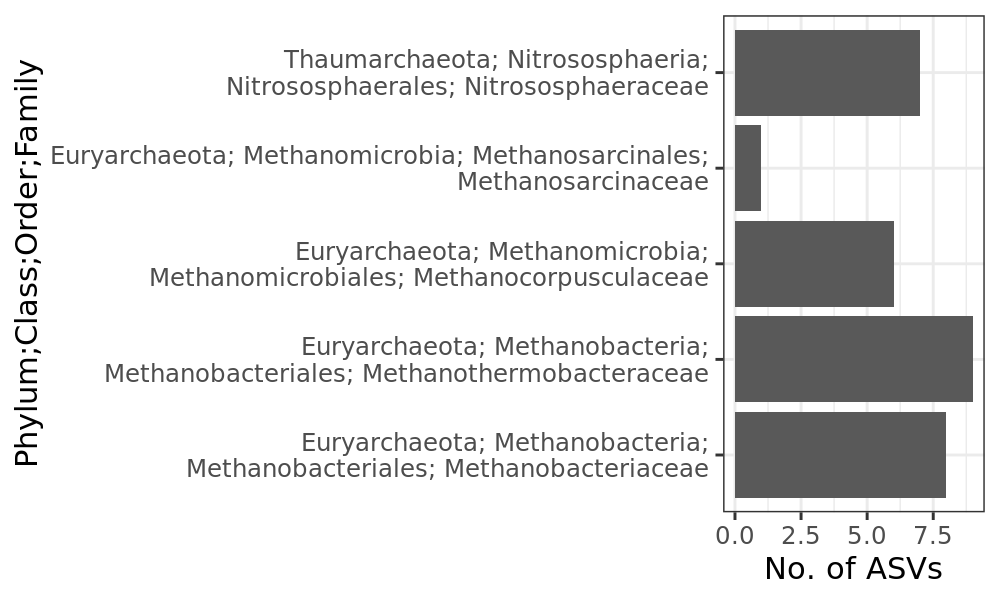

In [21]:
# signficant OTUs
p = physig_res_sig %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 50)) %>%
    ggplot(aes(Taxonomy)) +
    geom_bar(position='dodge') +
    labs(x='Phylum;Class;Order;Family', y='No. of ASVs') +
    theme_bw() +
    coord_flip()

p.dims(5,3)
plot(p)

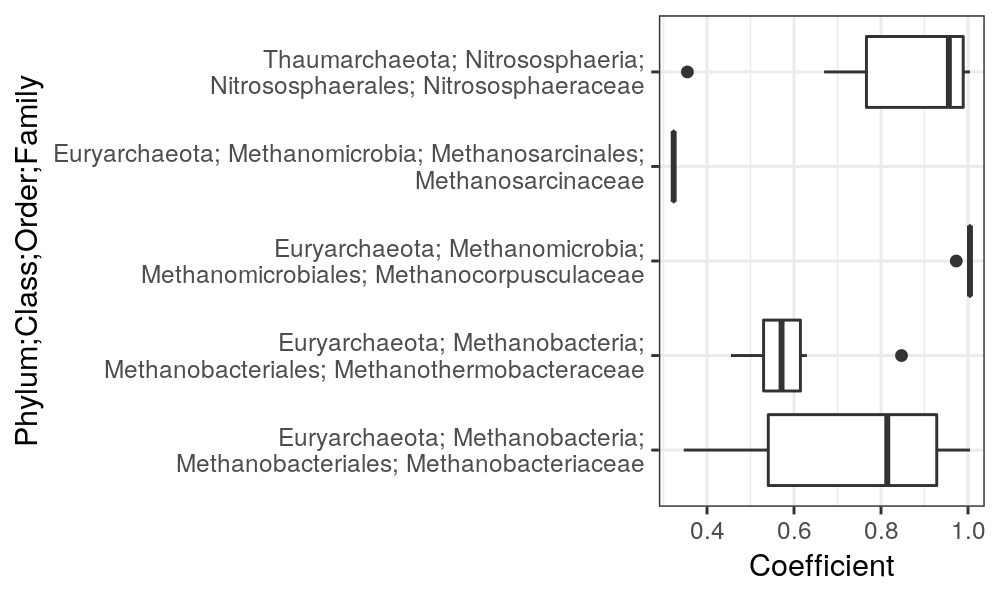

In [59]:
# plotting distribution of coef values
p = physig_res_sig %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 50)) %>%
    ggplot(aes(Taxonomy, coef)) +
    geom_boxplot() +
    labs(x='Phylum;Class;Order;Family', y='Coefficient') +
    theme_bw() +
    coord_flip()

p.dims(5,3)
plot(p)

### combined plot

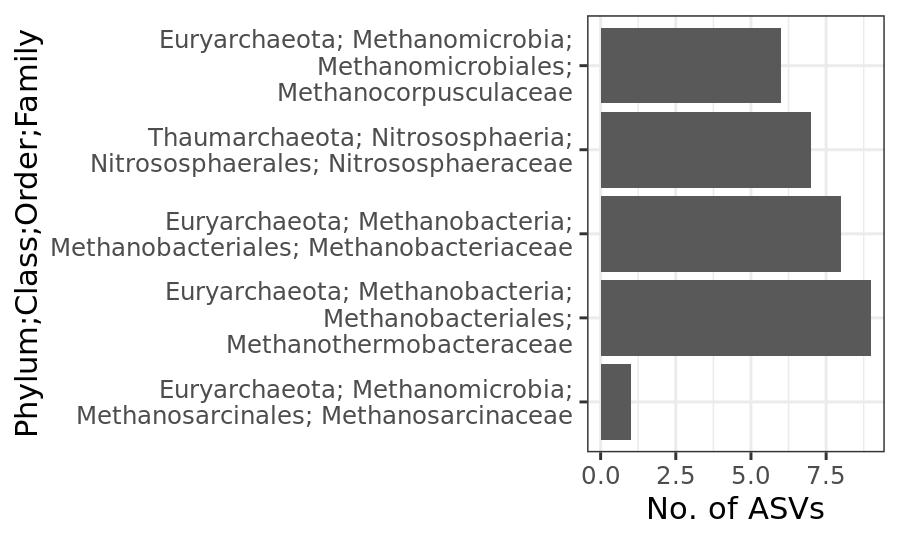

In [30]:
# signficant OTUs
p = physig_res_sig %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    group_by(Taxonomy) %>%
    mutate(mean_coef = mean(coef)) %>%
    ungroup() %>%
    mutate(Taxonomy = Taxonomy %>% reorder(mean_coef)) %>%
    ggplot(aes(Taxonomy)) +
    geom_bar(position='dodge') +
    labs(x='Phylum;Class;Order;Family', y='No. of ASVs') +
    theme_bw() +
    coord_flip()

p.dims(4.5,2.7)
plot(p)

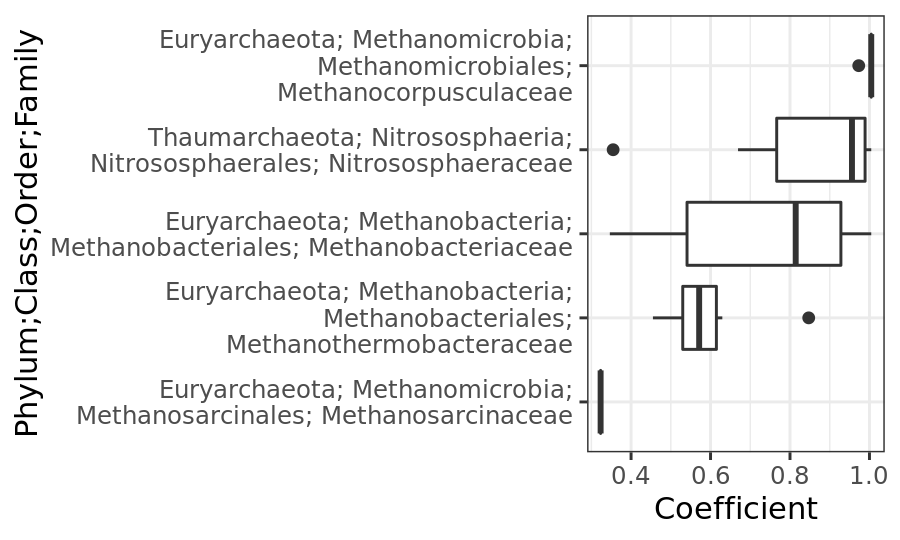

In [29]:
# plotting distribution of coef values
p = physig_res_sig %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 40)) %>%
    group_by(Taxonomy) %>%
    mutate(mean_coef = mean(coef)) %>%
    ungroup() %>%
    mutate(Taxonomy = Taxonomy %>% reorder(mean_coef)) %>%
    ggplot(aes(Taxonomy, coef)) +
    geom_boxplot() +
    labs(x='Phylum;Class;Order;Family', y='Coefficient') +
    theme_bw() +
    coord_flip()

p.dims(4.5,2.7)
plot(p)

#### Notes

* Abouheif‘s Cmean is the only measure to not use branch lengths
* Abouheif‘s Cmean & Moran's I measure autocorrelation; not an evolutionary model

## lipaMoran

* local phylogenetic signal

In [60]:
# calculating lipaMoran for each trait
.lipaMoran_per = function(trait, tree_4d, reps=999, ...){
    res = lipaMoran(tree_4d, trait=trait, reps = reps, prox.phylo = "nNodes", ...)
    z = colnames(res$lipa)[1]
    x = res$lipa
    colnames(x) = c('coef')
    y = res$p.value 
    colnames(y) = c('pvalue')
    df = cbind(x,y) %>% as.data.frame
    df$OTU = z
    df$host = rownames(df)
    rownames(df) = 1:nrow(df)
    return(df)
}

lipaMoran_per = function(tree_4d, traits, reps=999, ...){
    traits %>%
        lapply(.lipaMoran_per, tree_4d=tree_4d, reps=reps, ...) %>%
        do.call(rbind, .)
}

In [61]:
# all traits (OTUs) to measure
traits = physig_res_j$OTU %>% unique
traits %>% length

[1] 192

In [62]:
# calculating 
RhpcBLASctl::blas_set_num_threads(1)
registerDoParallel(threads)

lipa_res = host_tree_4d %>%
    plyr::llply(lipaMoran_per, traits=as.list(traits), 
                reps=9999, .parallel=TRUE) %>%
    data.table::rbindlist(use.names=TRUE, idcol='perm_rep')
lipa_res

perm_rep,coef,pvalue,OTU,host
<int>,<dbl>,<dbl>,<chr>,<chr>
1,NaN,NA,X6e9321684640a05dd16b7bc01b98c14a,Leuciscus_idus
1,NaN,NA,X6e9321684640a05dd16b7bc01b98c14a,Leuciscus_cephalus
⋮,⋮,⋮,⋮,⋮
100,0.00112428,0.6592,X36fd5c55ad082f4d05194157da9d13da,Bradypus_variegatus
100,0.00112428,0.6589,X36fd5c55ad082f4d05194157da9d13da,Choloepus_didactylus


In [85]:
# saving output
outfile = file.path(work_dir, 'phylosignal_rare250_lipaMoran.RDS')
cat(outfile)

/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig//phylosignal_rare250_lipaMoran.RDS

In [64]:
## saving output (WARNING!)
saveRDS(lipa_res, outfile)
cat('File written:', outfile, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig//phylosignal_rare250_lipaMoran.RDS 


In [86]:
# re-loading values
lipa_res = readRDS(outfile)
lipa_res

perm_rep,coef,pvalue,OTU,host
<int>,<dbl>,<dbl>,<chr>,<chr>
1,NaN,NA,X6e9321684640a05dd16b7bc01b98c14a,Leuciscus_idus
1,NaN,NA,X6e9321684640a05dd16b7bc01b98c14a,Leuciscus_cephalus
⋮,⋮,⋮,⋮,⋮
100,0.00112428,0.6592,X36fd5c55ad082f4d05194157da9d13da,Bradypus_variegatus
100,0.00112428,0.6589,X36fd5c55ad082f4d05194157da9d13da,Choloepus_didactylus


In [66]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/04_cophylo/02f_phylosignal_rare250.ipynb')


Sending email to: nyoungblut@tuebingen.mpg.de



### Summary

In [87]:
# raw p-values
lipa_res$pvalue %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.13    0.41    0.44    0.73    1.00  124520 

In [88]:
# summarizing 
lipa_res_s = lipa_res %>%
    group_by(OTU, perm_rep) %>%
    mutate(qvalue = p.adjust(as.Num(pvalue), method='BH')) %>%
    group_by(OTU, host) %>%
    summarize(coef = mean(coef),
              qvalue = (length(qvalue) - sum(qvalue < 0.05)) / length(qvalue),
              .groups='drop') %>%
    mutate(sig = qvalue < 0.05)

lipa_res_s %>% .$qvalue %>% summary
lipa_res_s %>% .$sig %>% table
lipa_res_s

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.000   1.000   0.941   1.000   1.000    4730 

.
FALSE  TRUE 
16110   280 

OTU,host,coef,qvalue,sig
<chr>,<chr>,<dbl>,<dbl>,<lgl>
a037a93b9d93156a9b42c06638063f81,Abramis_brama,0.00815489,0.91,FALSE
a037a93b9d93156a9b42c06638063f81,Aepyceros_melampus,-0.01616354,1.00,FALSE
⋮,⋮,⋮,⋮,⋮
X9f56339e83804b62fd2e269181961eff,Vulpes_vulpes,0.005200715,1,FALSE
X9f56339e83804b62fd2e269181961eff,Zamenis_longissimus,0.012487257,0,TRUE


In [89]:
# adding taxonomy & host info
lipa_res_s = lipa_res_s %>%
    inner_join(physeq %>% 
                 phyloseq2df(tax_table) %>%
                 mutate(OTU = gsub('^([0-9])', 'X\\1', OTU)), 
               c('OTU')) %>%
    inner_join(metadata %>% 
                distinct(scientific_name, class, order, family, genus,
                         diet, habitat, digestive_system),
               c('host'='scientific_name'))
lipa_res_s

OTU,host,coef,qvalue,sig,Domain,Phylum,Class,Order,Family,Genus,Species,class,order,family,genus,habitat,diet,digestive_system
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a037a93b9d93156a9b42c06638063f81,Abramis_brama,0.00815489,0.91,FALSE,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. ISO3-F5,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,aquatic habitat,omnivore,simple
a037a93b9d93156a9b42c06638063f81,Aepyceros_melampus,-0.01616354,1.00,FALSE,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. ISO3-F5,Mammalia,Artiodactyla,Bovidae,Aepyceros,terrestrial habitat,herbivore,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X9f56339e83804b62fd2e269181961eff,Vulpes_vulpes,0.005200715,1,FALSE,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,Mammalia,Carnivora,Canidae,Vulpes,terrestrial habitat,omnivore,simple
X9f56339e83804b62fd2e269181961eff,Zamenis_longissimus,0.012487257,0,TRUE,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,Reptilia,Squamata,Colubridae,Zamenis,terrestrial habitat,carnivore,simple


In [90]:
# significant taxa
df.dims(30)
lipa_res_s %>%
    filter(sig == TRUE) %>%
    dplyr::select(-sig, -Domain) %>%
    arrange(Phylum, Class, Order, Family, Genus)
df.dims()

OTU,host,coef,qvalue,Phylum,Class,Order,Family,Genus,Species,class,order,family,genus,habitat,diet,digestive_system
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
fef7f12170973768f687441336fa56f2,Carassius_gibelio,3.0735364,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,unclassified,Actinopterygii,Cypriniformes,Cyprinidae,Carassius,aquatic habitat,omnivore,simple
fef7f12170973768f687441336fa56f2,Cyprinus_carpio,3.0088436,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,unclassified,Actinopterygii,Cypriniformes,Cyprinidae,Cyprinus,aquatic habitat,omnivore,simple
e43f45c2930279f3571d2f3101e74f81,Bradypus_variegatus,0.6622838,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter boviskoreani JH1,Mammalia,Pilosa,Bradypodidae,Bradypus,terrestrial habitat,herbivore,foregut
e43f45c2930279f3571d2f3101e74f81,Choloepus_didactylus,1.4759130,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter boviskoreani JH1,Mammalia,Pilosa,Megalonychidae,Choloepus,terrestrial habitat,herbivore,foregut
e821169d5ae6270af1ef4cd7b5865396,Macropus_fuliginosus,3.5797907,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,Mammalia,Diprotodontia,Macropodidae,Macropus,terrestrial habitat,herbivore,foregut
e821169d5ae6270af1ef4cd7b5865396,Macropus_giganteus,3.2521677,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,Mammalia,Diprotodontia,Macropodidae,Macropus,terrestrial habitat,herbivore,foregut
ee963bc80b65cd4073bcdc0015446e4f,Aepyceros_melampus,1.5008982,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,Mammalia,Artiodactyla,Bovidae,Aepyceros,terrestrial habitat,herbivore,foregut
ee963bc80b65cd4073bcdc0015446e4f,Connochaetes_taurinus,1.0575685,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,Mammalia,Artiodactyla,Bovidae,Connochaetes,terrestrial habitat,herbivore,foregut
ee963bc80b65cd4073bcdc0015446e4f,Gazella_subgutturosa,1.0976581,0.00,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,Mammalia,Artiodactyla,Bovidae,Gazella,terrestrial habitat,herbivore,foregut


In [95]:
# summarizing number of sig OTUs
lipa_res_s_s = lipa_res_s %>%
    filter(sig == TRUE) %>%
    dplyr::select(-sig, -Domain) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, Genus, sep='; '),
           Host_tax = paste(class, order, sep=';')) %>%
    group_by(Taxonomy, Host_tax) %>%
    summarize(n_OTUs = n(), .groups='drop') 

df.dims(10)
lipa_res_s_s
df.dims()

Taxonomy,Host_tax,n_OTUs
<chr>,<chr>,<int>
Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobacterium,Actinopterygii;Cypriniformes,2
Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter,Actinopterygii;Cypriniformes,21
Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter,Amphibia;Anura,6
Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter,Amphibia;Caudata,3
Euryarchaeota; Methanobacteria; Methanobacteriales; Methanobacteriaceae; Methanobrevibacter,Aves;Anseriformes,6
⋮,⋮,⋮
Euryarchaeota; Methanobacteria; Methanobacteriales; Methanothermobacteraceae; Methanothermobacter,Aves;Piciformes,3
Euryarchaeota; Methanobacteria; Methanobacteriales; Methanothermobacteraceae; Methanothermobacter,Aves;Strigiformes,5
Euryarchaeota; Methanomicrobia; Methanomicrobiales; Methanocorpusculaceae; Methanocorpusculum,Mammalia;Artiodactyla,2


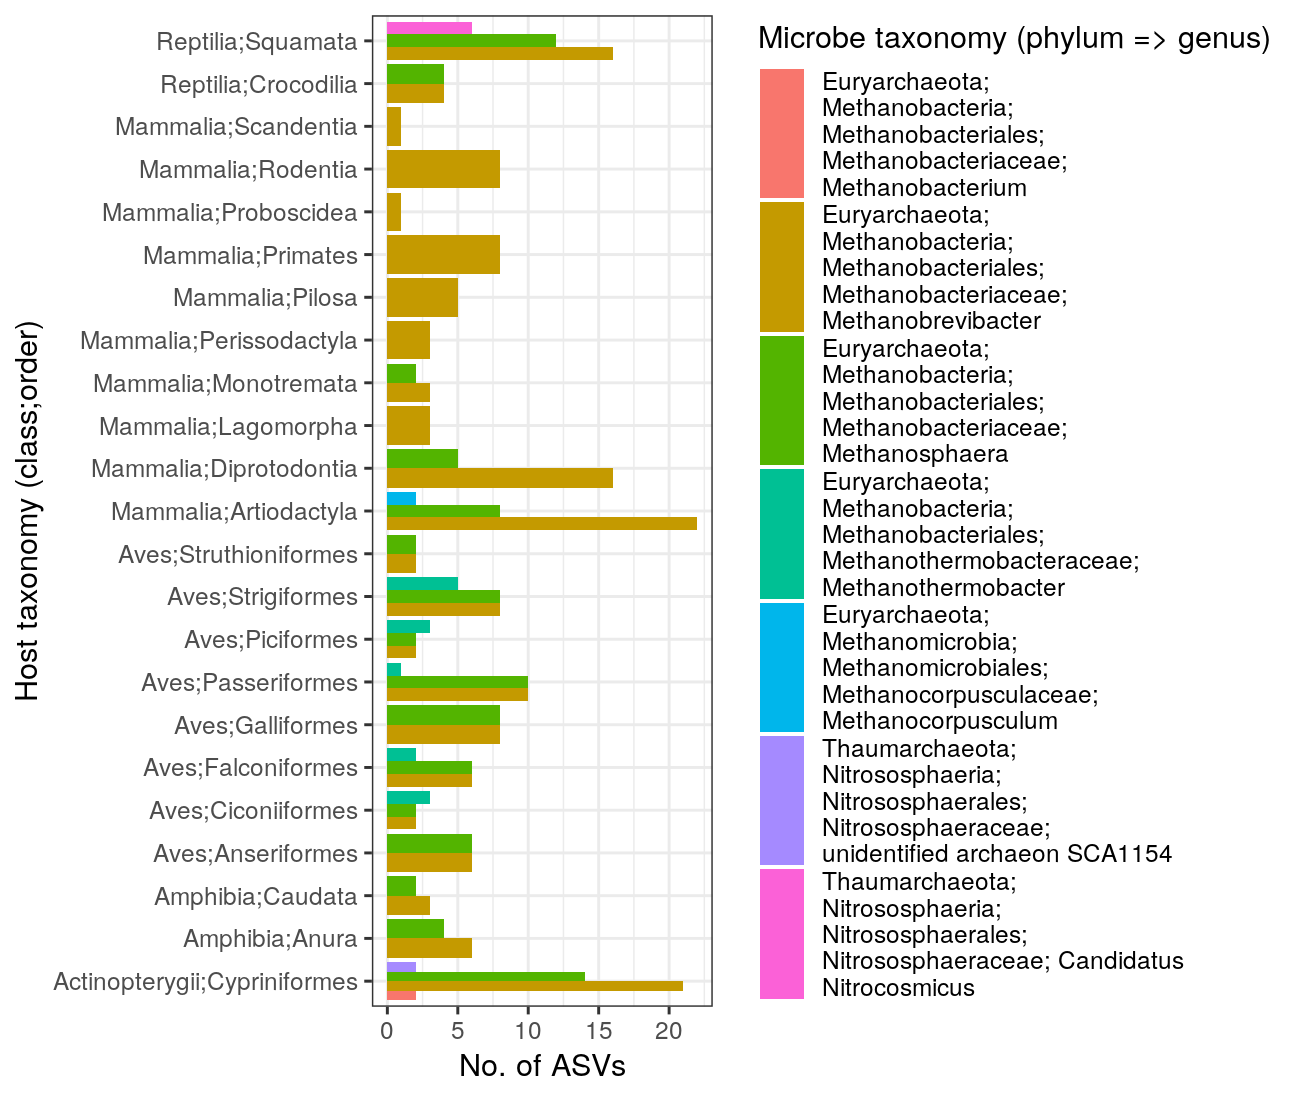

In [98]:
# plotting
p = lipa_res_s_s %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 30)) %>%
    ggplot(aes(Host_tax, n_OTUs, fill=Taxonomy)) +
    geom_bar(stat='identity', position='dodge') +
    scale_fill_discrete('Microbe taxonomy (phylum => genus)') +
    #scale_y_log10() +
    labs(x='Host taxonomy (class;order)', y='No. of ASVs') +
    theme_bw() +
    coord_flip() +
    theme(
        legend.key.height = unit(1.1, "cm")
    ) +
    guides(fill=guide_legend(ncol=1))

p.dims(6.5,5.5)
plot(p)

### iTOL

* creating input for iTOL

#### Number of OTUs per species

In [73]:
lipa_res_s_s = lipa_res_s %>%
    filter(sig == TRUE) %>%
    dplyr::select(-sig, -Domain) %>%
    mutate(Taxonomy = paste(Phylum, Class, sep=';')) %>%
    group_by(host, Taxonomy) %>%
    summarize(n_OTUs = n(), .groups='drop') %>%
    spread(Taxonomy, n_OTUs, fill=0) %>%
    as.data.frame
rownames(lipa_res_s_s) = lipa_res_s_s$host
lipa_res_s_s$host = NULL

lipa_res_s_s$n_OTUs %>% summary
lipa_res_s_s

Length  Class   Mode 
     0   NULL   NULL 

,Euryarchaeota;Methanobacteria,Euryarchaeota;Methanomicrobia,Thaumarchaeota;Nitrososphaeria
,<dbl>,<dbl>,<dbl>
Abramis_brama,5,0,0
Aepyceros_melampus,3,0,0
⋮,⋮,⋮,⋮
Vipera_ursinii,4,0,0
Zamenis_longissimus,5,0,3


In [74]:
# summary barplot w/ number of OTUs per host
outfile = file.path(work_dir, 'lipaMoran_n-OTUs_rare250_multibar.txt')
itol_multibar(lipa_res_s_s, 'lipaMoran_n-OTUs_rare250', outfile)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig//lipaMoran_n-OTUs_rare250_multibar.txt 


#### heatmap


Setting initial dates...
Fitting in progress... get a first set of estimates
         (Penalised) log-lik = -137.5558 
Optimising rates... dates... -137.5558 
Optimising rates... dates... -137.5535 

log-Lik = -37.00601 
PHIIC = 219.53 


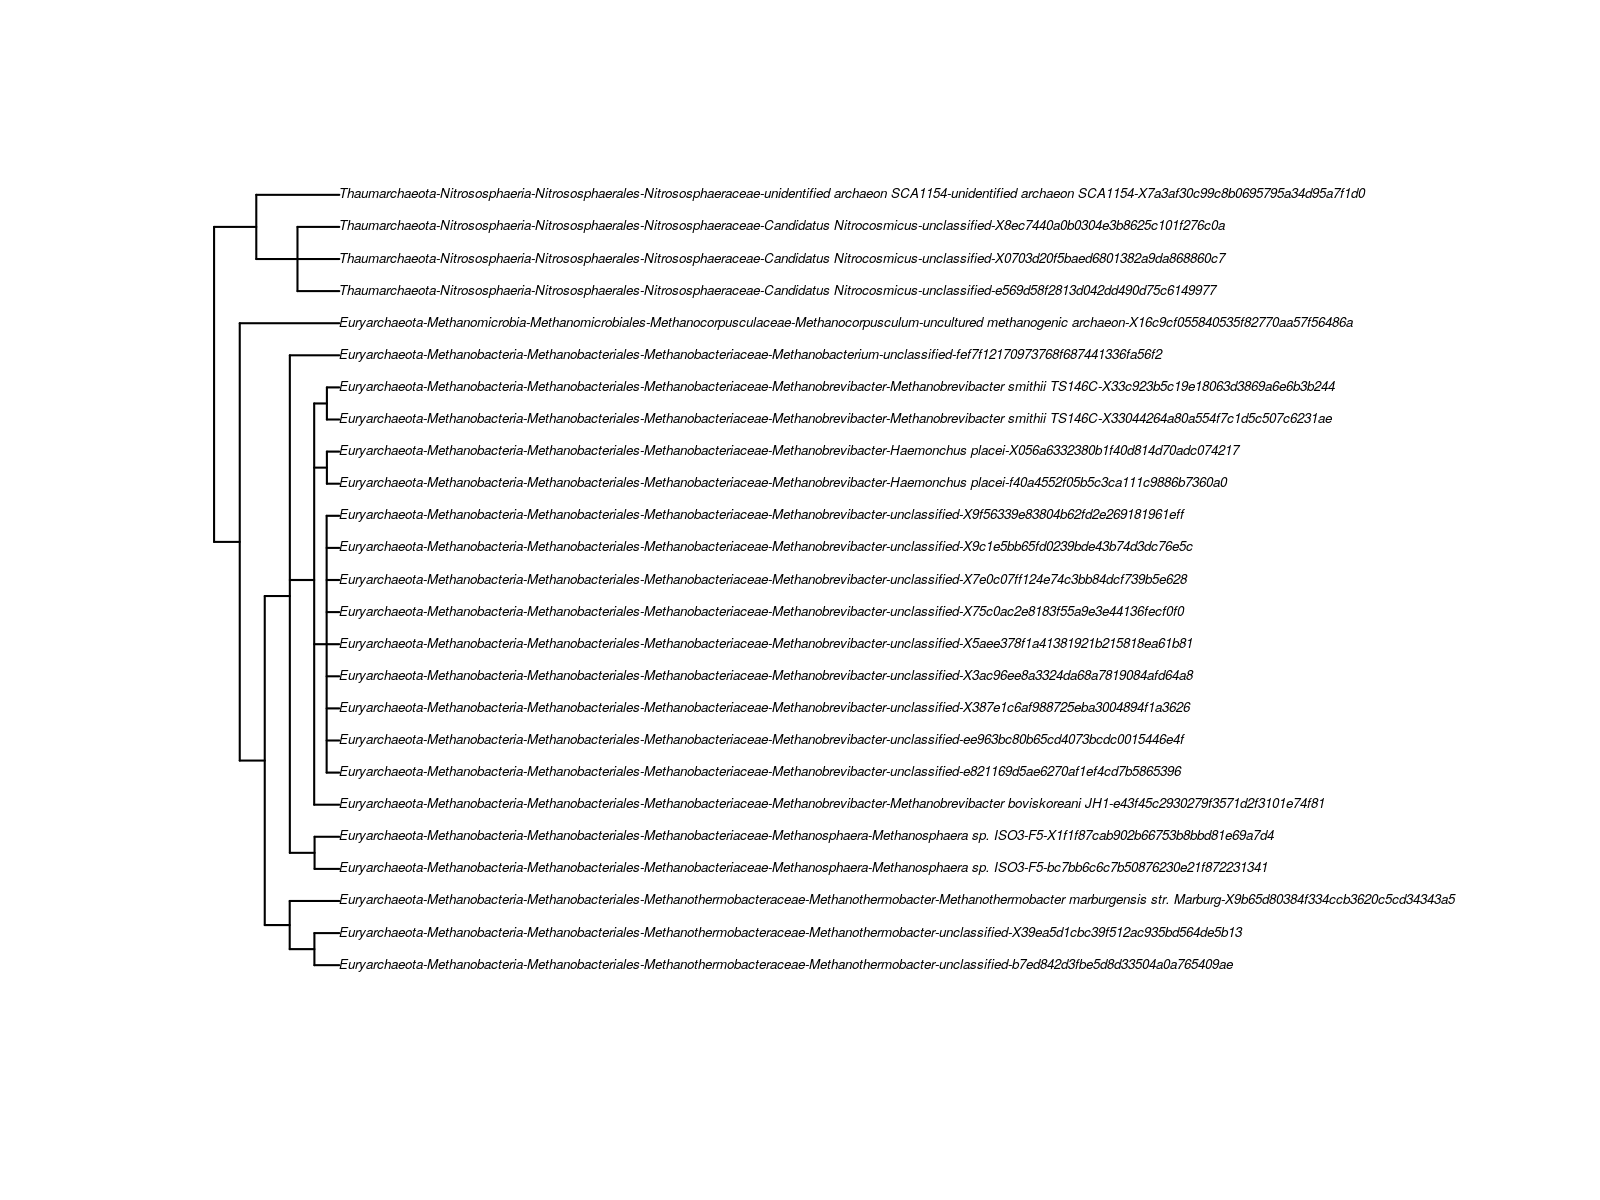

In [80]:
# dendrogram of clades
tmp = lipa_res_s %>%
    filter(sig == TRUE) %>%
    distinct(Domain, Phylum, Class, Order, Family, Genus, Species, OTU) %>%
    mutate(OTU_ID = gsub('^', 'OTU.', OTU %>% as.factor %>% as.numeric)) %>%
    mutate(Taxonomy = paste(Phylum, Class, Order, Family, Genus, Species, OTU, sep='-')) %>%
    mutate(Domain = Domain %>% as.factor,
           Phylum = Phylum %>% as.factor,
           Class = Class %>% as.factor,
           Order = Order %>% as.factor,
           Family = Family %>% as.factor,
           Genus = Genus %>% as.factor,
           Species = Species %>% as.factor,
           Taxonomy = Taxonomy %>% as.factor) 

clado = as.phylo(~Domain/Phylum/Class/Order/Family/Genus/Species/Taxonomy, data=tmp)
clado = compute.brlen(clado, 1)
clado = chronos(clado)
p.dims(8,6)
plot(clado, cex=0.4, x.lim=c(0,10))

In [76]:
# 16S tree
tree16S = readRDS(physeq_arch_IndD_file) %>% phy_tree
tree16S$tip.label = gsub('^([0-9])', 'X\\1', tree16S$tip.label)

# filtering
to_keep = lipa_res_s %>% filter(sig == TRUE) %>% .$OTU
to_rm = setdiff(tree16S$tip.label, to_keep)
tree16S = drop.tip(tree16S, to_rm)

# renaming
x = tmp %>% dplyr::select(OTU, Taxonomy) %>% as.data.frame
rownames(x) = x$OTU
tree16S$tip.label = x[tree16S$tip.label, 'Taxonomy']

# status
tree16S


Phylogenetic tree with 25 tips and 24 internal nodes.

Tip labels:
	Euryarchaeota-Methanomicrobia-Methanomicrobiales-Methanocorpusculaceae-Methanocorpusculum-uncultured methanogenic archaeon-X16c9cf055840535f82770aa57f56486a, Thaumarchaeota-Nitrososphaeria-Nitrososphaerales-Nitrososphaeraceae-unidentified archaeon SCA1154-unidentified archaeon SCA1154-X7a3af30c99c8b0695795a34d95a7f1d0, Thaumarchaeota-Nitrososphaeria-Nitrososphaerales-Nitrososphaeraceae-Candidatus Nitrocosmicus-unclassified-X0703d20f5baed6801382a9da868860c7, Thaumarchaeota-Nitrososphaeria-Nitrososphaerales-Nitrososphaeraceae-Candidatus Nitrocosmicus-unclassified-X8ec7440a0b0304e3b8625c101f276c0a, Thaumarchaeota-Nitrososphaeria-Nitrososphaerales-Nitrososphaeraceae-Candidatus Nitrocosmicus-unclassified-e569d58f2813d042dd490d75c6149977, Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-unclassified-X9f56339e83804b62fd2e269181961eff, ...
Node labels:
	0.916, 0.039, 0.348, 0.415, 0.879,

In [77]:
# formatting data frame
lipa_sub_res_s_f = lipa_res_s %>%
    filter(sig == TRUE) %>%
    rename('scientific_name' = host) %>%
    mutate(scientific_name = gsub(' ', '_',  scientific_name)) %>%
    inner_join(tmp %>% dplyr::select(OTU, Taxonomy), c('OTU')) %>%
    distinct(Taxonomy, scientific_name, coef) %>%
    spread(Taxonomy, coef, fill=0) %>%
    as.data.frame

rownames(lipa_sub_res_s_f) = lipa_sub_res_s_f$scientific_name
lipa_sub_res_s_f$scientific_name = NULL
lipa_sub_res_s_f

,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobacterium-unclassified-fef7f12170973768f687441336fa56f2,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-Haemonchus placei-f40a4552f05b5c3ca111c9886b7360a0,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-Haemonchus placei-X056a6332380b1f40d814d70adc074217,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-Methanobrevibacter boviskoreani JH1-e43f45c2930279f3571d2f3101e74f81,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-Methanobrevibacter smithii TS146C-X33044264a80a554f7c1d5c507c6231ae,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-Methanobrevibacter smithii TS146C-X33c923b5c19e18063d3869a6e6b3b244,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-unclassified-e821169d5ae6270af1ef4cd7b5865396,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-unclassified-ee963bc80b65cd4073bcdc0015446e4f,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-unclassified-X387e1c6af988725eba3004894f1a3626,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanobrevibacter-unclassified-X3ac96ee8a3324da68a7819084afd64a8,⋯,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanosphaera-Methanosphaera sp. ISO3-F5-bc7bb6c6c7b50876230e21f872231341,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanobacteriaceae-Methanosphaera-Methanosphaera sp. ISO3-F5-X1f1f87cab902b66753b8bbd81e69a7d4,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanothermobacteraceae-Methanothermobacter-Methanothermobacter marburgensis str. Marburg-X9b65d80384f334ccb3620c5cd34343a5,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanothermobacteraceae-Methanothermobacter-unclassified-b7ed842d3fbe5d8d33504a0a765409ae,Euryarchaeota-Methanobacteria-Methanobacteriales-Methanothermobacteraceae-Methanothermobacter-unclassified-X39ea5d1cbc39f512ac935bd564de5b13,Euryarchaeota-Methanomicrobia-Methanomicrobiales-Methanocorpusculaceae-Methanocorpusculum-uncultured methanogenic archaeon-X16c9cf055840535f82770aa57f56486a,Thaumarchaeota-Nitrososphaeria-Nitrososphaerales-Nitrososphaeraceae-Candidatus Nitrocosmicus-unclassified-e569d58f2813d042dd490d75c6149977,Thaumarchaeota-Nitrososphaeria-Nitrososphaerales-Nitrososphaeraceae-Candidatus Nitrocosmicus-unclassified-X0703d20f5baed6801382a9da868860c7,Thaumarchaeota-Nitrososphaeria-Nitrososphaerales-Nitrososphaeraceae-Candidatus Nitrocosmicus-unclassified-X8ec7440a0b0304e3b8625c101f276c0a,Thaumarchaeota-Nitrososphaeria-Nitrososphaerales-Nitrososphaeraceae-unidentified archaeon SCA1154-unidentified archaeon SCA1154-X7a3af30c99c8b0695795a34d95a7f1d0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abramis_brama,0,0,0,0,0,0,0,0.000000,0.02074513,0,⋯,0.01772633,0.02485567,0,0,0,0,0,0,0,0
Aepyceros_melampus,0,0,0,0,0,0,0,1.500898,0.00000000,0,⋯,0.00000000,0.00000000,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vipera_ursinii,0,0,0,0,0,0,0,0,0.02107043,0,⋯,0.01793618,0.02510677,0,0,0,0,0.000000,0.000000,0.000000,0
Zamenis_longissimus,0,0,0,0,0,0,0,0,0.02094108,0,⋯,0.01790802,0.02511749,0,0,0,0,3.388548,3.467735,3.128183,0


In [78]:
# heatmap w/ cladogram
outfile = file.path(work_dir, 'lipaMoran_n-OTUs_rare250_OTU-htmp.txt')
itol_heatmap(lipa_sub_res_s_f, 'lipaMoran_n-OTUs_rare250', 
             outfile, tree=clado)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig//lipaMoran_n-OTUs_rare250_OTU-htmp.txt 


In [79]:
# heatmap w/ 16S
outfile = file.path(work_dir, 'lipaMoran_n-OTUs_rare250_16S_OTU-htmp.txt')
itol_heatmap(lipa_sub_res_s_f, 'lipaMoran_n-OTUs_rare250', 
             outfile, tree=tree16S)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/cophylo/phylosig//lipaMoran_n-OTUs_rare250_16S_OTU-htmp.txt 


# sessionInfo

In [61]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-physig/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] LeyLabRMisc_0.1.5 doParallel_1.0.15 iterators_1.0.12  foreach_1.5.0    
 [5] phylosignal_1.3   phyloseq_1.32.0   ape_5.4           ggplot2_3.3.1    
 [9] tidyr_1.1.0       dplyr_1.0.0      

loaded via a namespace (and not attached):
  [1] nlme_3.1-148     